Purpose:
- build the cell-cell graph
- embed cells in 2D (UMAP)
- identify clusters (Leiden)
- Save a resusable, clustered object

Load data & Libraries

In [22]:
import scanpy as sc
import matplotlib.pyplot as plt

adata = sc.read(r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\data\processed\adata_pca.h5ad")

Sanity check

In [23]:
adata

AnnData object with n_obs × n_vars = 178971 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Percent_mt', 'Patient', 'Gender', 'Subtype', 'Stage', 'seurat_clusters', 'Study', 'Cell_Cluster_level1', 'Cell_Cluster_level2', 'validation_original_annotation', 'id', 'predicted.celltypel1.score', 'predicted.celltypel1', 'predicted.celltypel2.score', 'predicted.celltypel2'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'X_name', 'hvg', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

Construct the neighborhood graph
**Conceptually**
- each cell becomes a node
- edges connect transcriptionally similar cells
- UMAP and clustering are both derived from this graph

In [24]:
sc.pp.neighbors(
    adata,
    n_neighbors=15,
    n_pcs=25
)

n_neighbors=15:
- local neighborhood size
- controls how 'local' structure is perserved
n_pcs=25:
- Uses the first 25 PCs
- Filters noise before graph construction

Compute UMAP embedding
**UMAP**
- perserves local neighborhoods
- projects high-dimensional graph -> 2D
- visualization only (not used for clustering)

In [25]:
sc.tl.umap(adata)

Initial UMAP visualization
- see overall structure
- identify obvious batch effects
- check if data looks biologically plausible

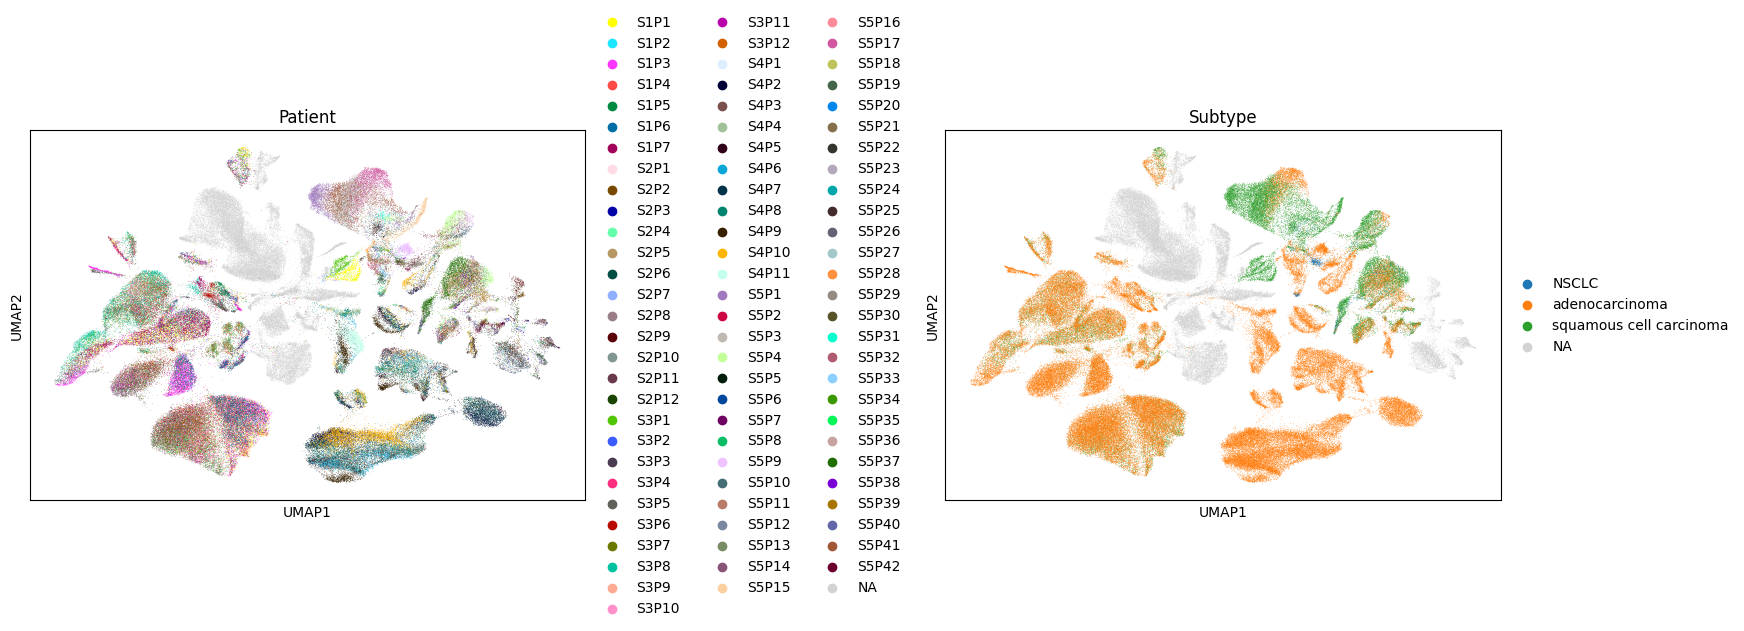

In [26]:
sc.pl.umap(
    adata,
    color=["Patient", "Subtype"],
    wspace=0.5,
)

## Analysis
- Subtype plot shows distinct clusters for adenocarcinoma and squamous cell carcinoma, indicating significantly different gene expression profiles
- No large region in patient plot dominated by a single patient -- no obvious batch effect

Clustering with Leiden
### Leiden clustering:
- operates on the neighborhood graph
- finds communities of similar cells
- resolution controls granularity

In [28]:
sc.tl.leiden(
    adata,
    resolution=0.6,
    key_added="leiden_r0.6",
    flavor="igraph",
    n_iterations=2,
    directed=False
)

Visualize clusters

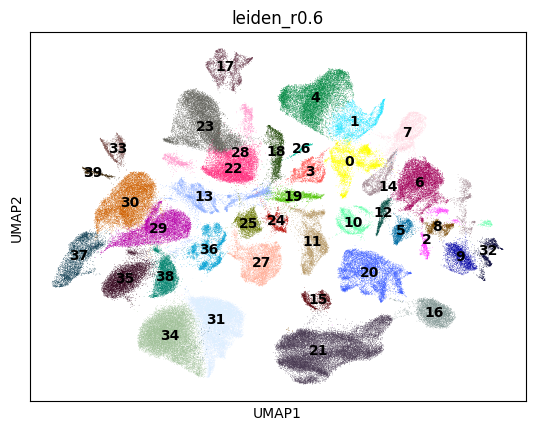

In [29]:
sc.pl.umap(
    adata,
    color="leiden_r0.6",
    legend_loc="on data"
)

Exploring Clustering resolution

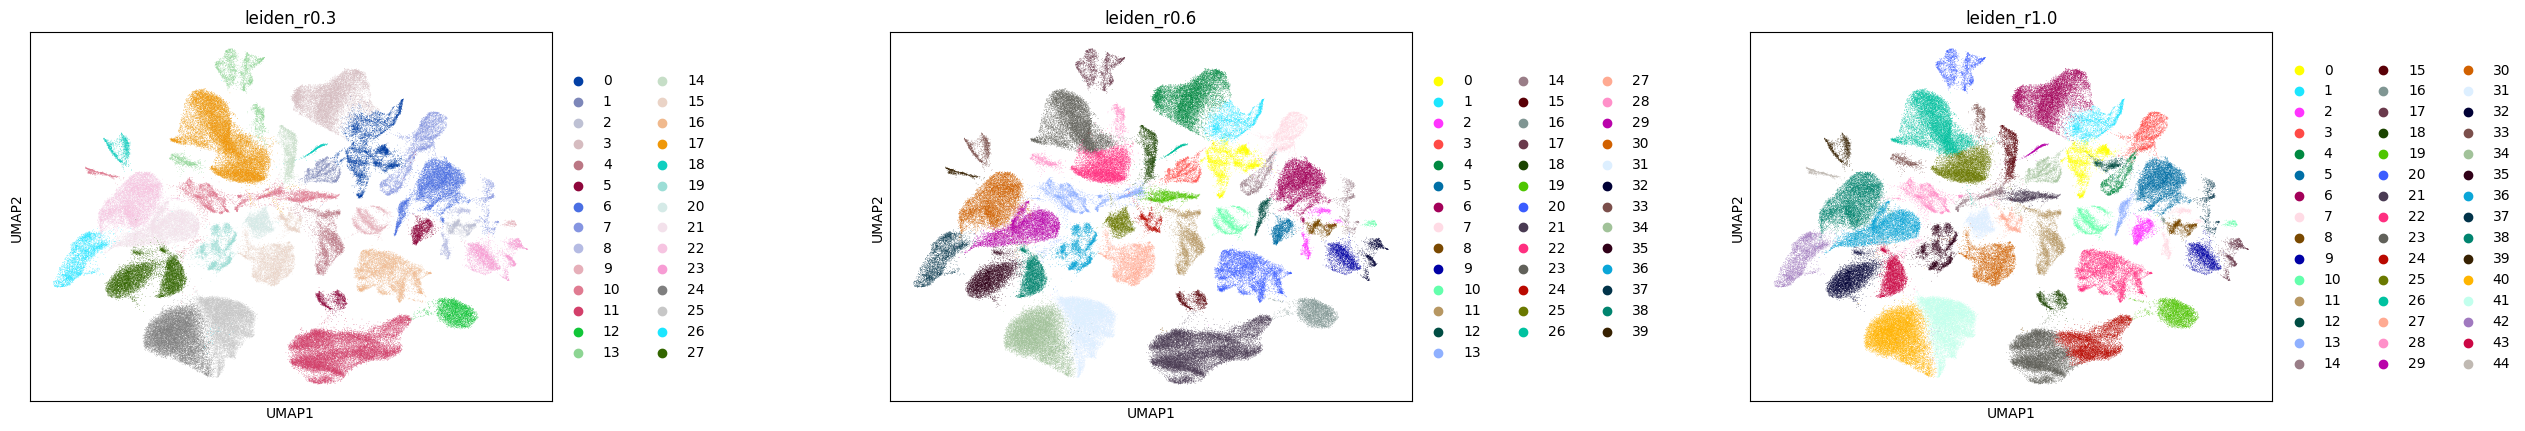

In [30]:
for res in [0.3, 0.6, 1.0]:
    sc.tl.leiden(adata, resolution=res, key_added=f"leiden_r{res}", flavor="igraph", n_iterations=2, directed=False)

sc.pl.umap(
    adata,
    color=["leiden_r0.3", "leiden_r0.6", "leiden_r1.0"],
    wspace=0.5,
)

Saving Leiden at a resoution of 0.6

In [31]:
sc.tl.leiden(
    adata,
    resolution=0.6,
    key_added="leiden",
    flavor="igraph",
    n_iterations=2,
    directed=False
)

In [32]:
adata.obs["leiden"].value_counts()

leiden
21    19528
34    14174
31    11743
23    11326
4      9907
30     9320
22     7708
6      7633
29     7236
20     7001
35     5754
27     4881
13     4413
38     4348
0      4051
11     3876
16     3850
37     3674
36     3221
7      3000
1      2835
9      2422
25     2418
17     2305
10     2227
18     2220
14     2087
19     2010
3      1808
5      1757
28     1463
8      1248
15     1242
33     1194
32     1136
12     1053
24     1012
2       931
39      544
26      415
Name: count, dtype: int64

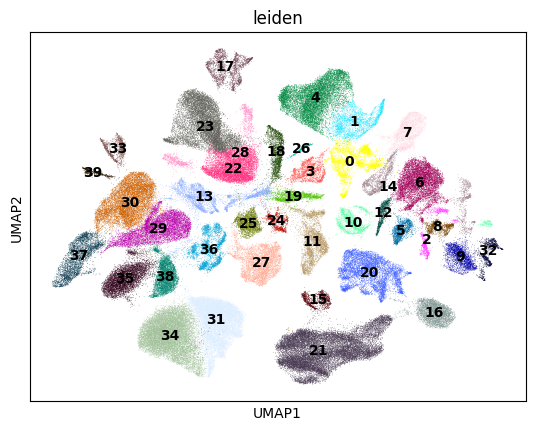

In [33]:
sc.pl.umap(
    adata,
    color="leiden",
    legend_loc="on data"
)

In [37]:
adata.obs = adata.obs.drop(
    columns=["leiden_r0.3","leiden_r1.0"],
    errors="ignore"
)

In [38]:
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Percent_mt', 'Patient',
       'Gender', 'Subtype', 'Stage', 'seurat_clusters', 'Study',
       'Cell_Cluster_level1', 'Cell_Cluster_level2',
       'validation_original_annotation', 'id', 'predicted.celltypel1.score',
       'predicted.celltypel1', 'predicted.celltypel2.score',
       'predicted.celltypel2', 'leiden_r0.6', 'leiden'],
      dtype='object')

In [39]:
adata.write(r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\data\processed\adata_umap_clusters_leiden0.6.h5ad")